In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from folium import plugins
from folium.plugins import HeatMapWithTime
import folium
import geopandas as gpd
from folium.plugins import HeatMap
%matplotlib inline

/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
#maximize cell
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
website_url = 'http://maavianrecords.com/review-list/white-ibis/'
result = requests.get(website_url)

result.status_code

200

In [4]:
tables = pd.read_html(website_url)

HTTPError: HTTP Error 403: Forbidden

In [257]:
#export tables to csv
eeev_year_state.to_csv('eeev_year_state.csv')
eeev_year.to_csv('eeev_year.csv')
eeev_state.to_csv('eeev_state.csv')
eeev_death.to_csv('eeev_death.csv')
eeev_year_state.to_csv('eeev_year_state.csv')

In [ ]:
#clean up in excesl and import back to pandas
eeev_year=pd.read_csv('eeev_year.csv',index_col=0)
eeev_state=pd.read_csv('eeev_state.csv',index_col=0)
eeev_death=pd.read_csv('eeev_death.csv',index_col=0)
eeev_year_state=pd.read_csv('eeev_year_state.csv',index_col=0)

In [ ]:
#plt EEEV cases US
eeev_year.plot(kind='bar',x='Year',y='Number of Reported Cases',label='Number of EEE cases');
plt.legend()
plt.xticks(rotation=0);

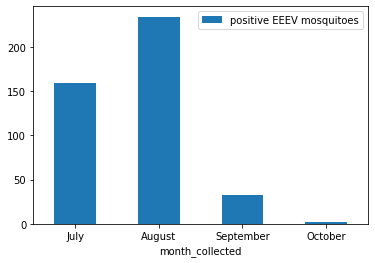

In [211]:
# plot mosquito collection months massachusetts
eeev_collection=pd.read_csv('mass_mosquito_collect_date.csv')
eeev_collection.plot(kind='bar',x='month_collected',y='count',label='positive EEEV mosquitoes')
plt.xticks(rotation=0)
plt.legend()

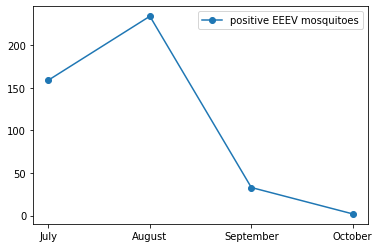

In [321]:
#same graph above but line chart
plt.plot('month_collected','count',data = eeev_collection,marker='o',label='positive EEEV mosquitoes')
plt.xticks(rotation=0)
plt.legend()

In [201]:
eeev_death=pd.read_csv('eeev_death.csv',index_col=0)
eeev_death

,Year,Cases,Deaths,Mortality_rate
0,2009,3,1,33
1,2010,10,5,50
2,2011,4,3,75
3,2012,15,5,33
4,2013,8,4,50
5,2014,8,2,25
6,2015,6,4,67
7,2016,7,3,43
8,2017,5,2,40
9,2018,6,1,17


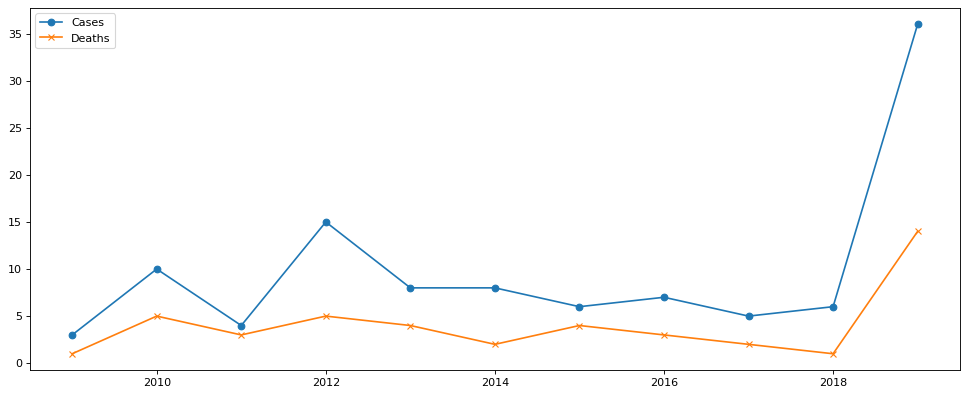

In [203]:
#line chart for infection and death counts for US by year
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot('Year','Cases',data=eeev_death,marker='o',label='Cases')
plt.plot('Year','Deaths',data=eeev_death,marker='x',label='Deaths')
plt.legend();

In [215]:
eeev_state

,State,Number of Reported Cases(2009-2018),2019
0,Alabama,1,0
1,Arkansas,1,0
2,Connecticut,1,4
3,Florida,13,0
4,Georgia,6,0
5,Indiana,0,1
6,Louisiana,2,0
7,Maine,2,0
8,Maryland,1,0
9,Massachusetts,10,12


ValueError: Unrecognized character N in format string

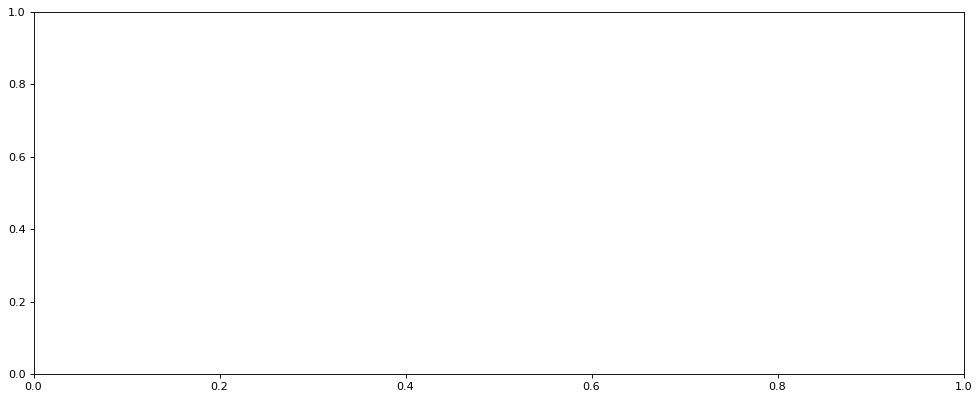

In [344]:
#comparison of past 10 years vs 2019.
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot('State','Number of Reported Cases(2009-2018)',data=eeev_state,marker='o',label='2009-2018')
plt.plot('State','2019',data=eeev_state,marker='x',label='2019')
plt.xticks(rotation=90)
plt.legend();


In [281]:
#dataframe of each positive human cases by state in 2009-2019
eeev_year_state=pd.read_csv('eeev_year_state.csv')
eeev_year_state

,State,pos_cases,year
0,Alabama,0,2009
1,Alabama,0,2010
2,Alabama,0,2011
3,Alabama,0,2012
4,Alabama,0,2013
...,...,...,...
567,Wyoming,0,2015
568,Wyoming,0,2016
569,Wyoming,0,2017
570,Wyoming,0,2018


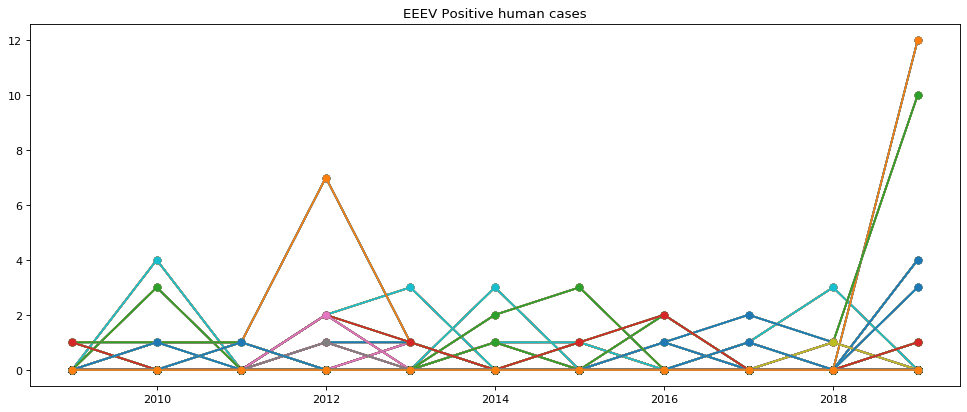

In [359]:
#graph of eeev_year state.
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

for i in eeev_year_state['State']:
    plt.plot('year','pos_cases',data=eeev_year_state[eeev_year_state['State']==i],marker='o')
plt.title('EEEV Positive human cases');


In [123]:
#import massachusetts county numbers(webscraped data)
mass_county_pos_mosquito=pd.read_csv('mass_county_pos_mosquito.csv')

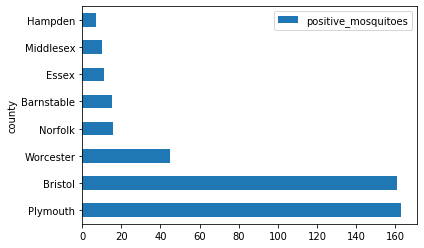

In [124]:
#plot previous table
mass_county_pos_mosquito.plot(kind='barh',x='county',y='positive_mosquitoes');

In [325]:
mass_pos_mosquito_years

,Year,Pos_mosquitoes
0,2014,33
1,2015,1
2,2016,1
3,2017,1
4,2018,2
5,2019,428


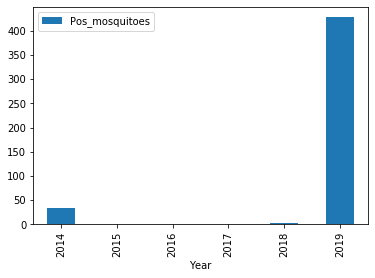

In [214]:
#plot positive EEEV mosquito counts in massachusetts
mass_pos_mosquito_years=pd.read_excel('mass_pos_mosquito_years.xlsx')
mass_pos_mosquito_years.plot()
plt.xticks(rotation=0)
plt.legend()

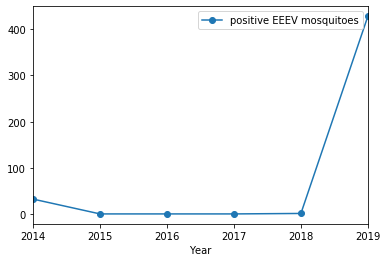

In [327]:
#same plot as above but line chart
mass_pos_mosquito_years.plot(x='Year',y='Pos_mosquitoes',marker='o',label='positive EEEV mosquitoes')
plt.xticks(rotation=0)
plt.legend()

In [170]:
#dataframe of massachusetts city pos mosquito count
mass_city_pos_mosquito=pd.read_csv('mass_city_pos_mosquito.csv')
mass_city_pos_mosquito.sort_values(by='positive_mosquitoes',ascending=False)

,city,positive_mosquitoes,latitude,longitude
23,Easton,46,42.02450,-71.1287
49,New Bedford,35,41.66000,-70.9400
13,Carver,35,41.88340,-70.7625
47,Middleborough,25,41.89000,-70.9300
54,Raynham,25,41.94870,-71.0731
55,Rehoboth,19,41.84700,-71.2394
56,Rochester,18,41.75500,70.8453
27,Freetown,16,41.76200,-71.0141
41,Marion,15,41.70000,-70.7600
37,Kingston,13,42.00000,-70.7200


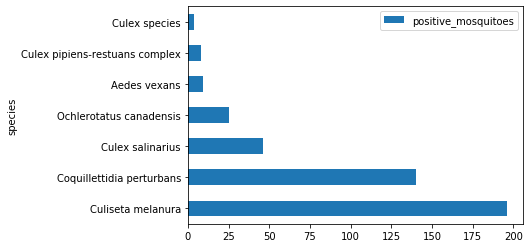

In [115]:
#graph of different mosquito species that were positive
mass_pos_mosquito_species=pd.read_csv('mass_pos_mosquito_species.csv')
mass_pos_mosquito_species
mass_pos_mosquito_species.plot(kind='barh',x='species',y='positive_mosquitoes');


In [125]:
#geospacial data for massachusetts county
mass_county_pos_mosquito

,county,positive_mosquitoes,latitude,longitude
0,Plymouth,163,41.9120,-70.7168
1,Bristol,161,41.7938,-71.1449
2,Worcester,45,42.4097,-71.8571
3,Norfolk,16,42.1767,-71.1449
4,Barnstable,15,41.6991,-70.3209
5,Essex,11,42.7051,-70.9071
6,Middlesex,10,42.4672,-71.2874
7,Hampden,7,42.1172,-72.6624


In [145]:
# Display clusters of positive mosquitoes collected for county

mass_map=folium.Map(location=[41.9120,-70.7168],zoom_start=9)
mass_map
counties = plugins.MarkerCluster().add_to(mass_map)


for lat, lng, label1 in zip(mass_county_pos_mosquito.latitude,mass_county_pos_mosquito.longitude, mass_county_pos_mosquito.positive_mosquitoes.astype(str)):
        folium.Marker(location=[lat, lng],icon=None,popup=label1).add_to(counties)

# Display map
mass_map
mass_map.save('mass_pos_county_map.html')

In [147]:
#Display clusters of positive mosquitoes for cities
mass_map=folium.Map(location=[41.9120,-70.7168],zoom_start=9)
mass_map
cities = plugins.MarkerCluster().add_to(mass_map)


for lat, lng, label1 in zip(mass_city_pos_mosquito.latitude,mass_city_pos_mosquito.longitude, mass_city_pos_mosquito.positive_mosquitoes.astype(str)):
        folium.Marker(location=[lat, lng],icon=None,popup=label1).add_to(cities)

# Display map
mass_map
mass_map.save('mass_pos_city_map.html')

In [192]:
#heatmap of pos mosquito by city
mass_map=folium.Map(location=[41.9120,-70.7168],zoom_start=9)
mass_map
HeatMap(data=mass_city_pos_mosquito[['latitude', 'longitude', 'positive_mosquitoes']], radius=25, max_val=20,max_zoom=6,blur=15).add_to(mass_map)
mass_map.save('mass_pos_city_heatmap.html')

In [197]:
#heatmap of pos mosquito by county
mass_map=folium.Map(location=[41.9120,-70.7168],zoom_start=9)
mass_map
HeatMap(data=mass_county_pos_mosquito[['latitude', 'longitude', 'positive_mosquitoes']], radius=40, max_val=163,max_zoom=8,blur=15).add_to(mass_map)
mass_map.save('mass_pos_county_heatmap.html')

In [334]:
#data from of michigan county with positive animal_cases
#michigan lacks positive mosquito data
mich_pos_map=pd.read_excel('mich_pos_map.xlsx')
mich_pos_map

,County,animal_cases,latitude,longitude
0,Allegan,2,42.5710,-86.3377
1,Barry,5,42.5354,-85.3550
2,Berrien,1,42.0321,-86.7416
3,Calhoun,3,42.2074,-85.0233
4,Cass,3,41.9299,-86.0122
5,Eaton,1,42.5886,-84.7733
6,Genesee,1,43.0777,-83.6774
7,Jackson,5,42.1764,-84.3542
8,Kalamazoo,9,42.2278,-85.5200
9,Kent,2,43.0097,-85.5200


In [342]:
#heatmap of positive animals for EEEV in michigan counties.
mich_map=folium.Map(location=[42.2278,-85.5200],zoom_start=8)
mich_map
HeatMap(data=mich_pos_map[['latitude', 'longitude', 'animal_cases']], radius=34, max_val=5,max_zoom=8,blur=15).add_to(mich_map)
mich_map.save('mich_pos_county_heatmap.html')

In [345]:
mich_pos_animals=pd.read_excel('mich_pos_animals.xlsx')
mich_pos_animals

,year,pos_animal
0,2011,3
1,2012,1
2,2013,1
3,2014,4
4,2015,5
5,2016,3
6,2017,8
7,2018,2
8,2019,48


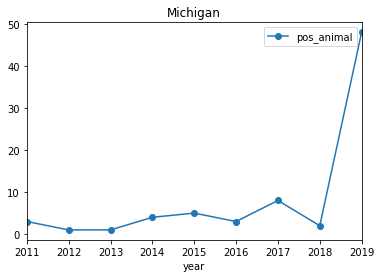

In [356]:
mich_pos_animals.plot('year','pos_animal',marker='o')
plt.title('Michigan')
plt.legend(loc='best')

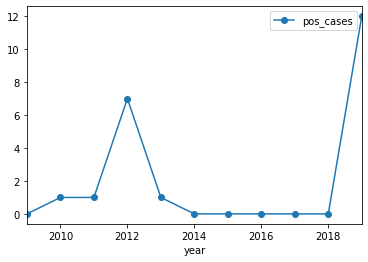

In [362]:
eeev_year_state[eeev_year_state['State']=='Massachusetts'].plot('year','pos_cases',marker='o');

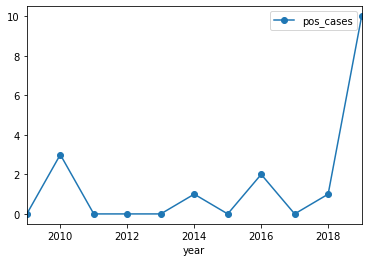

In [363]:
eeev_year_state[eeev_year_state['State']=='Michigan'].plot('year','pos_cases',marker='o');

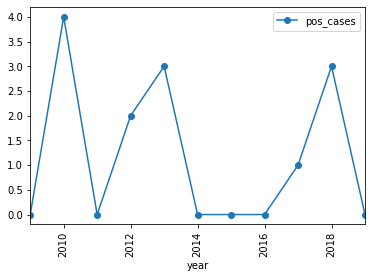

In [373]:
eeev_year_state[eeev_year_state['State']=='Florida'].plot('year','pos_cases',marker='o')
plt.xticks(rotation=90);

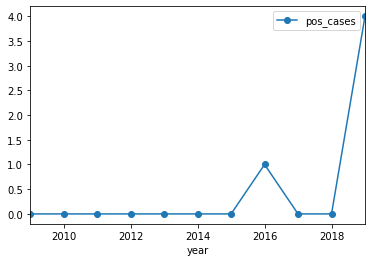

In [365]:
eeev_year_state[eeev_year_state['State']=='New Jersey'].plot('year','pos_cases',marker='o');

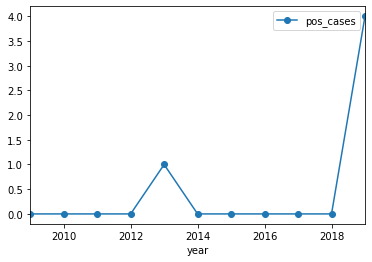

In [366]:
eeev_year_state[eeev_year_state['State']=='Connecticut'].plot('year','pos_cases',marker='o');

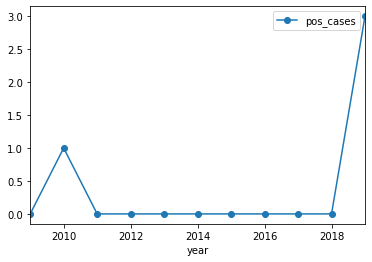

In [367]:
eeev_year_state[eeev_year_state['State']=='Rhode Island'].plot('year','pos_cases',marker='o');